# **Data Visualizations**

In [1]:
# Install and import libraries
!pip install seaborn --quiet

## Loading Datasets

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("/content/Personality_Syncora_Synthetic 1.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,4.0,7.0,0,13.0,4.0,0
1,1.0,0,4.0,4.0,0,11.0,5.0,0
2,4.0,1,3.0,1.0,1,3.0,1.0,1
3,6.0,1,0.0,2.0,1,1.0,0.0,1
4,-0.0,0,4.0,6.0,0,13.0,5.0,0


## Basic Overview

In [3]:
# Dataset shape and data types
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (4998, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           4998 non-null   float64
 1   Stage_fear                 4998 non-null   int64  
 2   Social_event_attendance    4998 non-null   float64
 3   Going_outside              4998 non-null   float64
 4   Drained_after_socializing  4998 non-null   int64  
 5   Friends_circle_size        4998 non-null   float64
 6   Post_frequency             4998 non-null   float64
 7   Personality                4998 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 312.5 KB


## Sumary Stats

In [4]:
# Describe the numerical columns
df.describe().T.style.background_gradient(cmap="YlGnBu")


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,4998.000000,4.452381,3.430728,-1.000000,2.000000,4.000000,7.000000,12.000000
Stage_fear,4998.000000,0.482993,0.499761,0.000000,0.000000,0.000000,1.000000,1.000000
Social_event_attendance,4998.000000,3.933774,2.874991,-1.000000,2.000000,4.000000,6.000000,11.000000
Going_outside,4998.000000,3.023009,2.233173,-1.000000,1.000000,3.000000,5.000000,8.000000
Drained_after_socializing,4998.000000,0.483593,0.499781,0.000000,0.000000,0.000000,1.000000,1.000000
Friends_circle_size,4998.000000,6.278912,4.275091,-1.000000,3.000000,5.000000,10.000000,16.000000
Post_frequency,4998.000000,3.560624,2.883958,-1.000000,1.000000,3.000000,6.000000,11.000000
Personality,4998.000000,0.480392,0.499665,0.000000,0.000000,0.000000,1.000000,1.000000


## Missing value check

In [7]:
# Check for missing or anomalous values
print("Missing values:\n", df.isnull().sum())
print("\nUnique values in each column:\n", df.nunique())
print("\nNegative values (possible errors):")
print((df < 0).sum())


Missing values:
 Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Unique values in each column:
 Time_spent_Alone             14
Stage_fear                    2
Social_event_attendance      13
Going_outside                10
Drained_after_socializing     2
Friends_circle_size          18
Post_frequency               13
Personality                   2
dtype: int64

Negative values (possible errors):
Time_spent_Alone             61
Stage_fear                    0
Social_event_attendance      26
Going_outside                 7
Drained_after_socializing     0
Friends_circle_size          20
Post_frequency               39
Personality                   0
dtype: int64


## Target Distribution

/tmp/ipython-input-2154246176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Personality", data=df, palette="Set2")


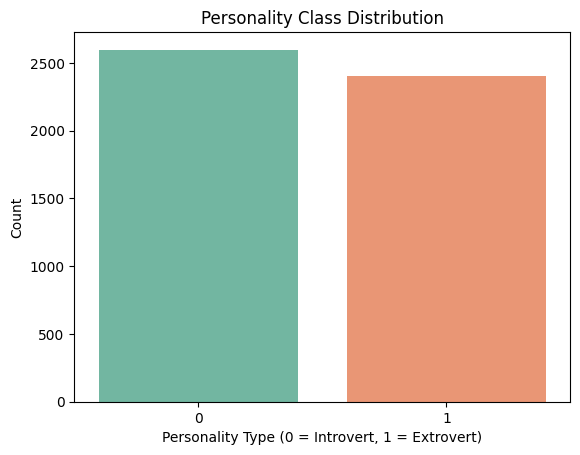

In [8]:
# Countplot of the target
sns.countplot(x="Personality", data=df, palette="Set2")
plt.title("Personality Class Distribution")
plt.xlabel("Personality Type (0 = Introvert, 1 = Extrovert)")
plt.ylabel("Count")
plt.show()


## Feature Distributions

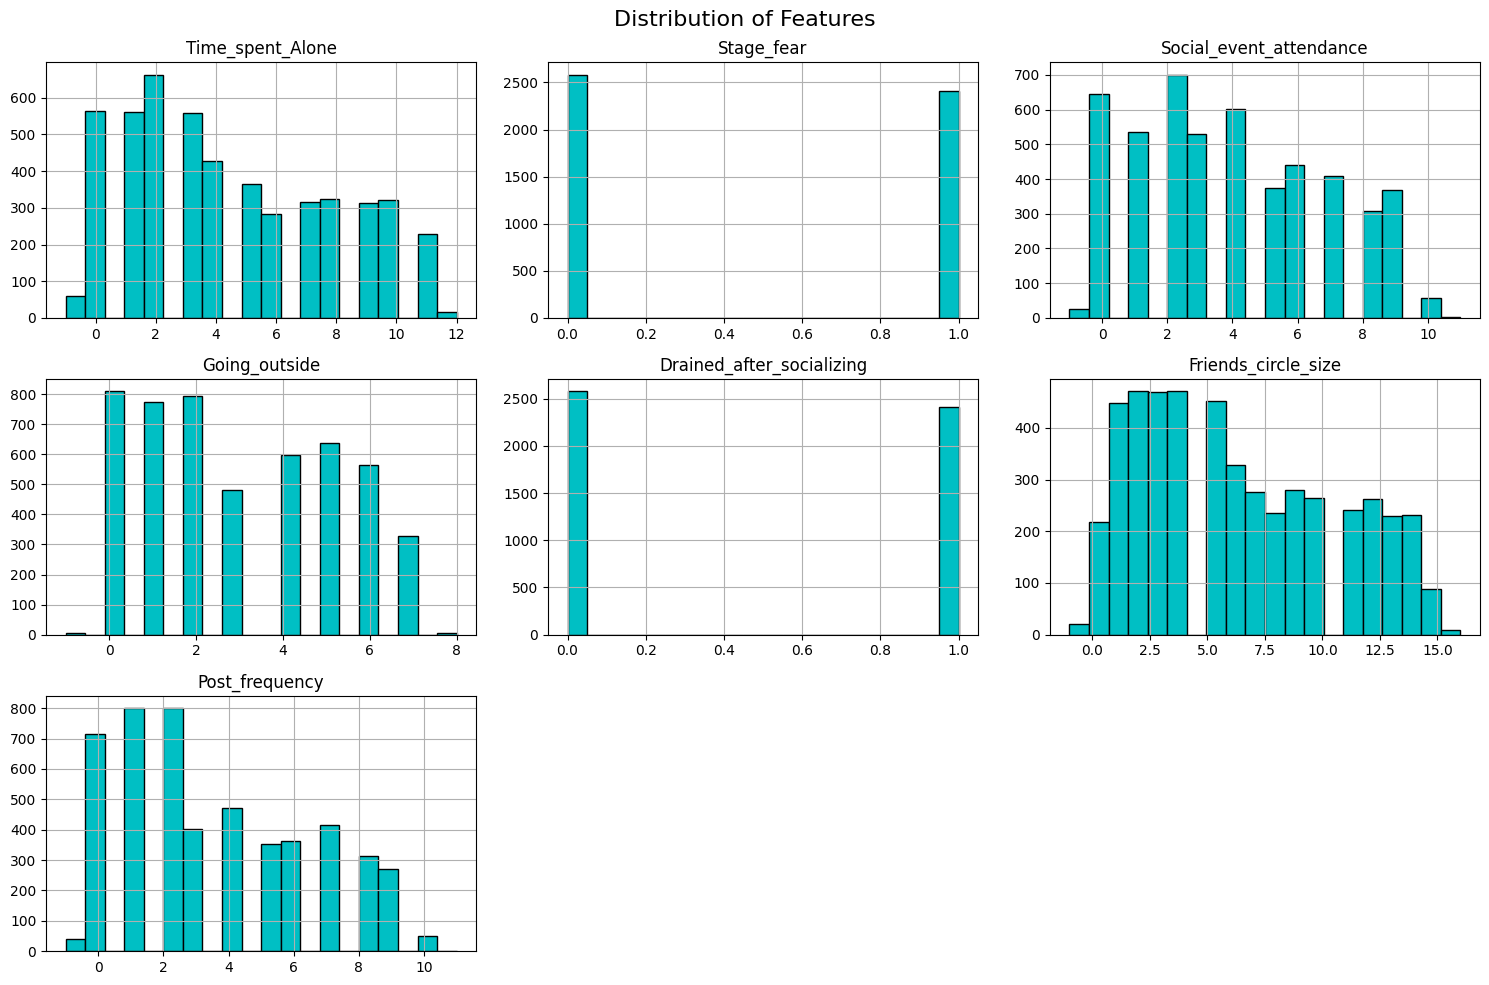

In [9]:
# Plot all features as histograms
df.drop(columns=["Personality"]).hist(figsize=(15, 10), bins=20, color="#00bfc4", edgecolor="black")
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()

## Correlation Heatmap

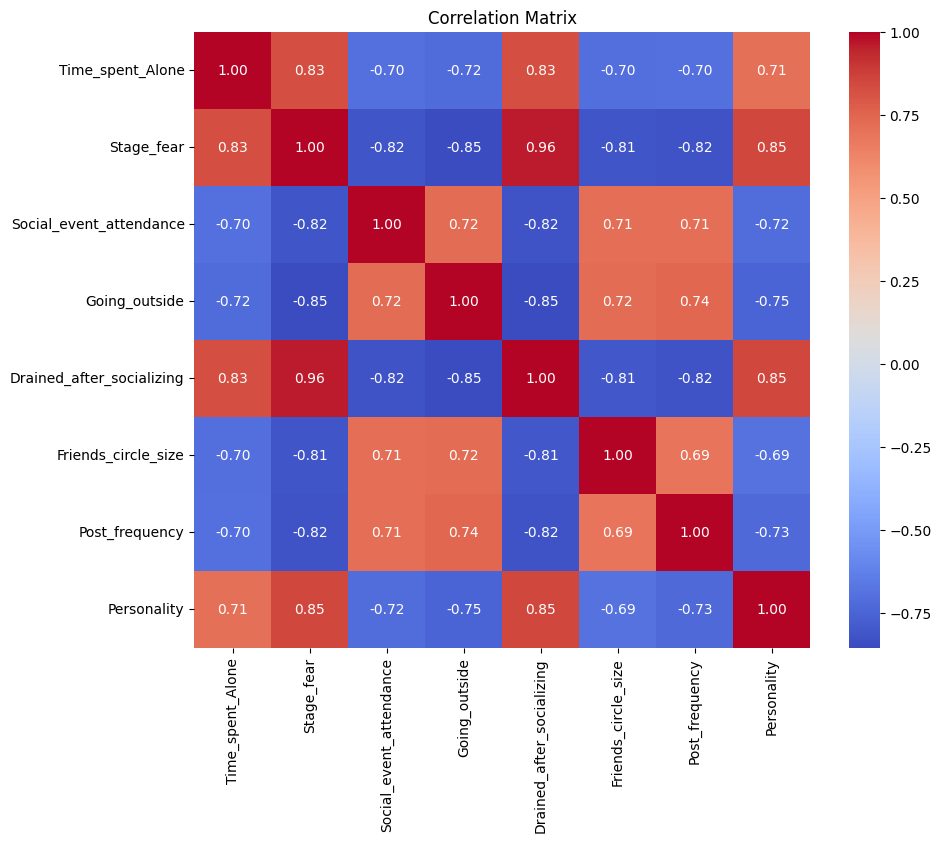

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

## Boxplots by Personality

/tmp/ipython-input-2359472133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personality", y=col, data=df, palette="Set3")
/tmp/ipython-input-2359472133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personality", y=col, data=df, palette="Set3")
/tmp/ipython-input-2359472133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personality", y=col, data=df, palette="Set3")
/tmp/ipython-input-2359472133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

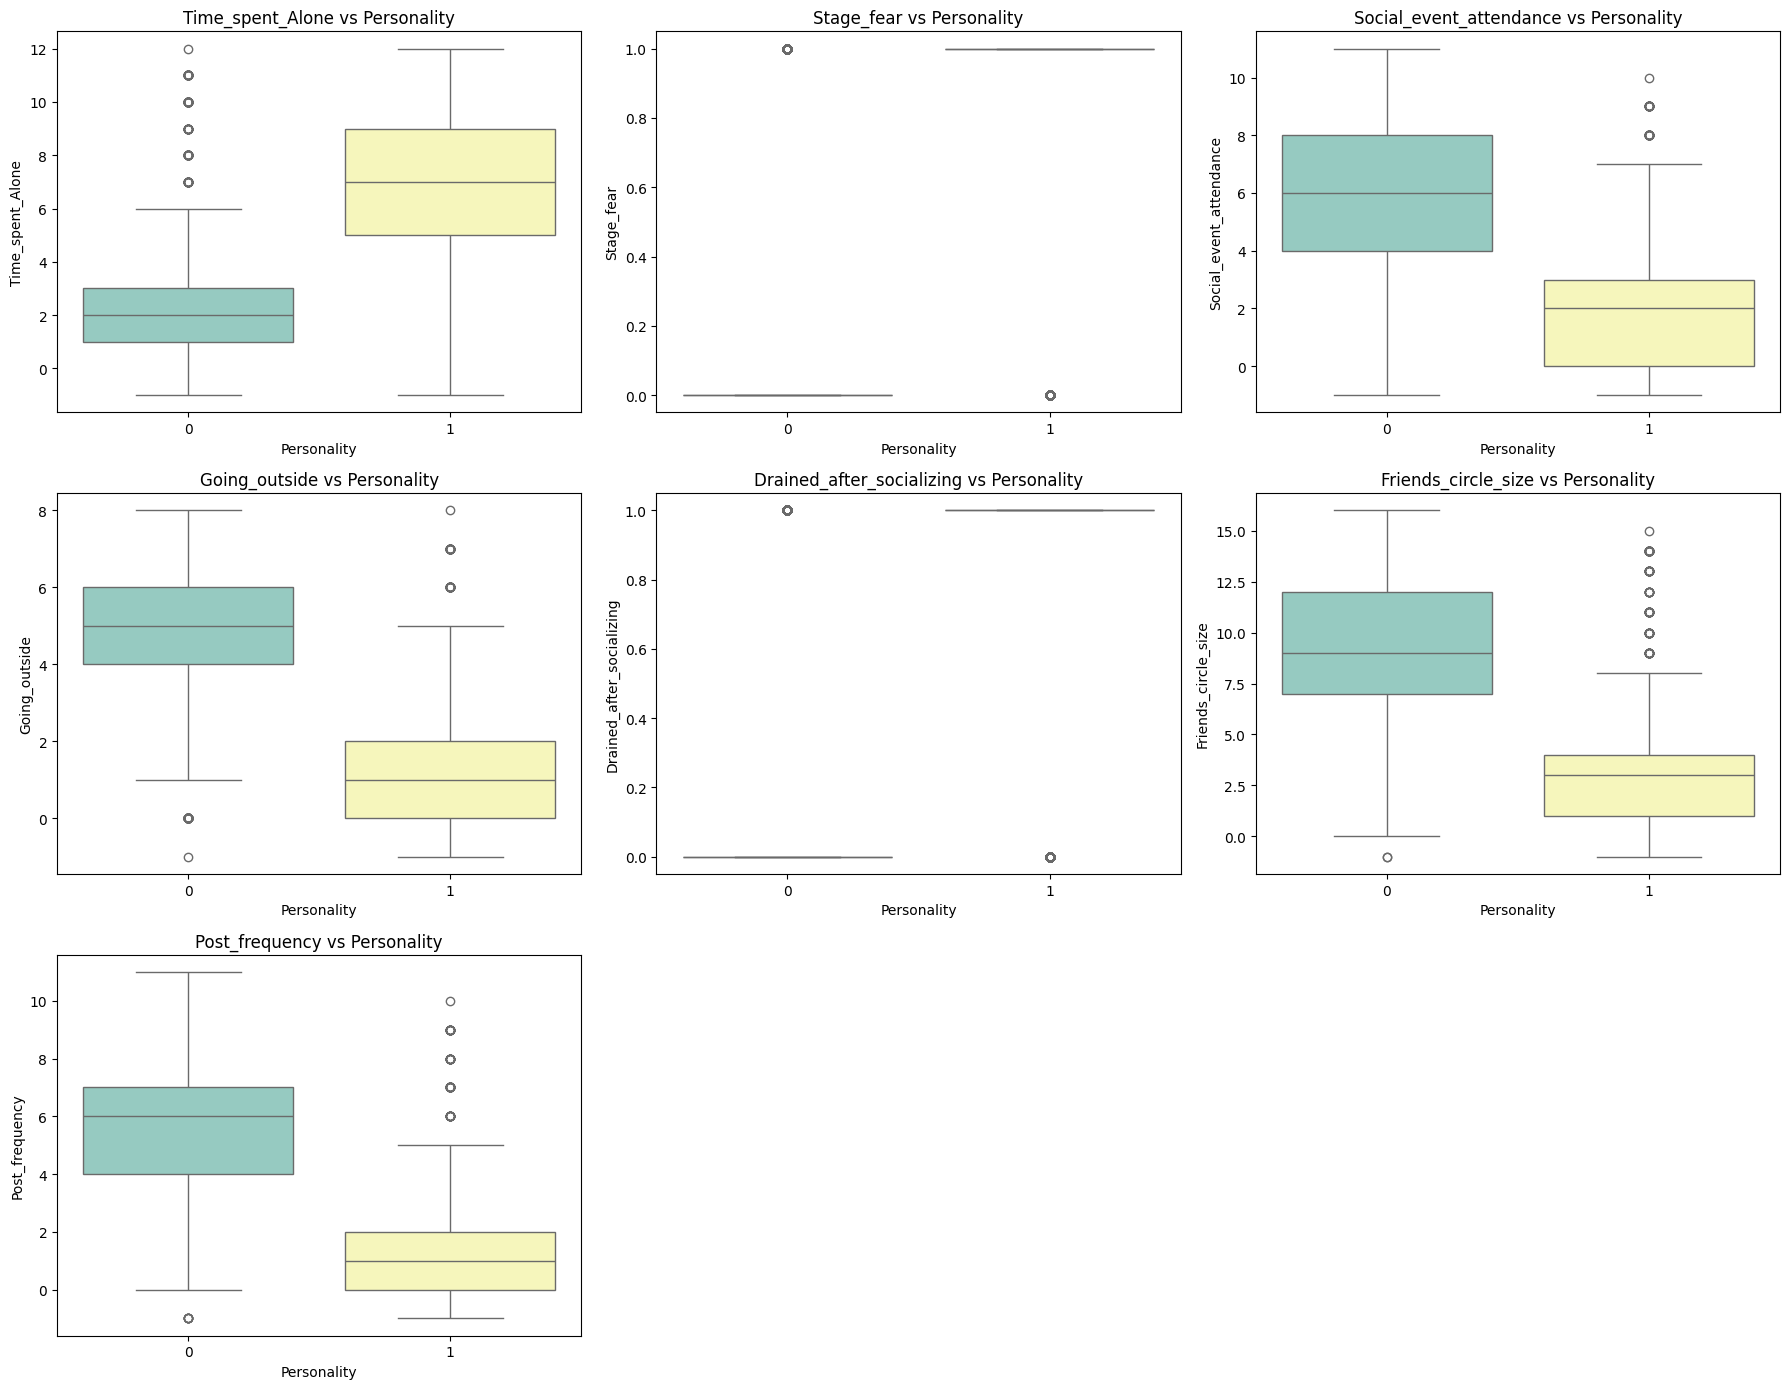

In [11]:
# Visualizing how each feature varies across Personality types
features = df.columns.drop("Personality")
plt.figure(figsize=(18, 14))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Personality", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Personality")
plt.tight_layout()
plt.show()


## Pairplot for Relationship Insights

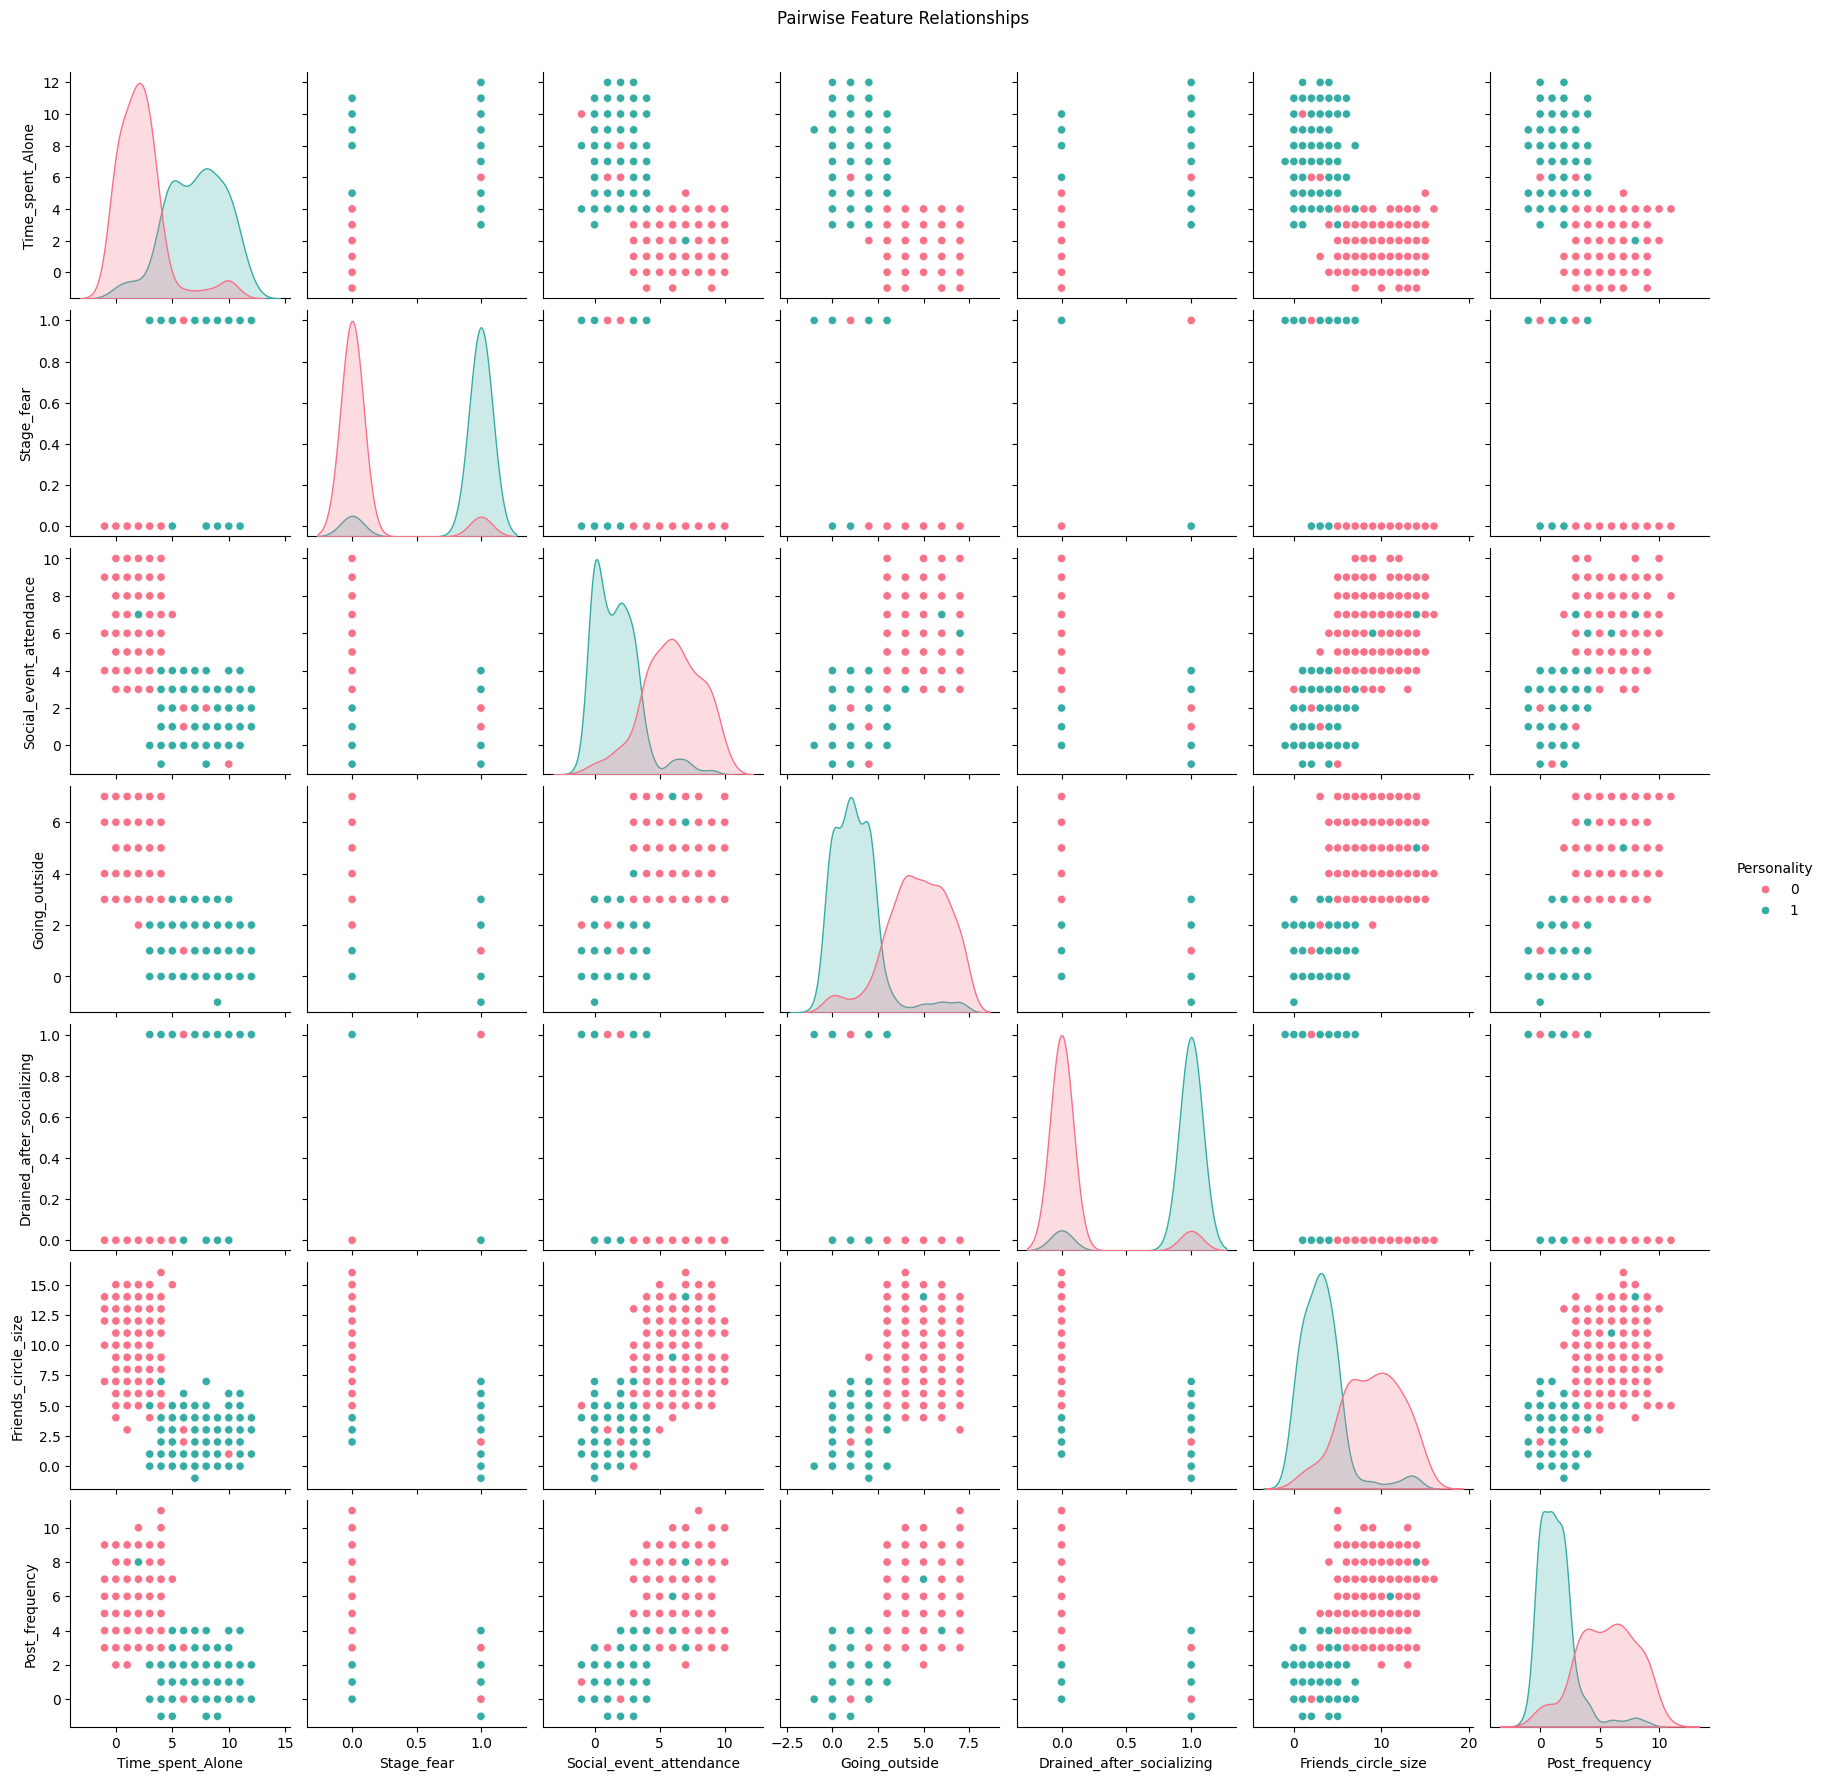

In [12]:
# Sample subset for better rendering
sample_df = df.sample(600, random_state=42)

sns.pairplot(sample_df, hue="Personality", palette="husl")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


# Model Training

## Data Preparation

In [13]:
# Define features and target
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Train-test split with stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (3998, 7), Test size: (1000, 7)


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


## Confusion Matrix

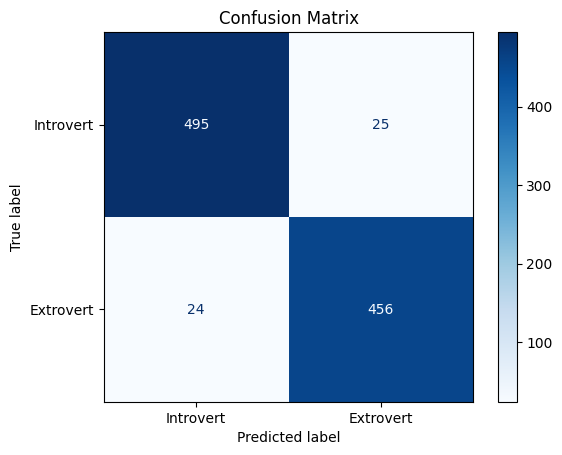

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Introvert", "Extrovert"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Classification Report

In [18]:
from sklearn.metrics import classification_report

# Detailed metrics
report = classification_report(y_test, y_pred, target_names=["Introvert", "Extrovert"])
print(report)


              precision    recall  f1-score   support

   Introvert       0.95      0.95      0.95       520
   Extrovert       0.95      0.95      0.95       480

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



## ROC Curve

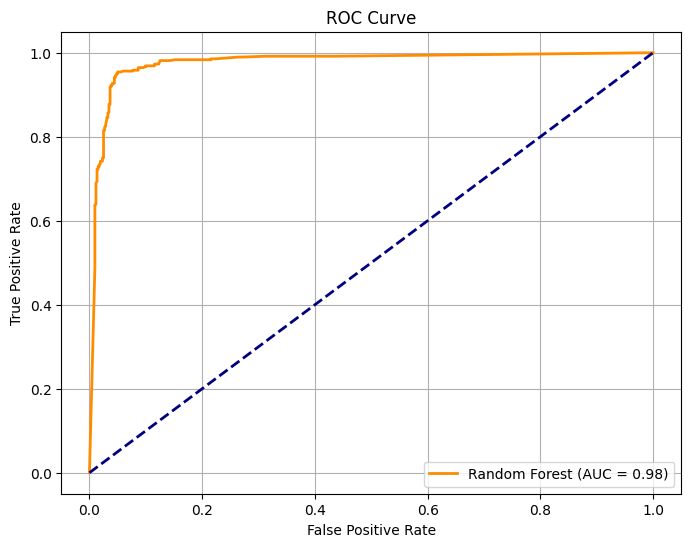

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Feature Importance

/tmp/ipython-input-1202877884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


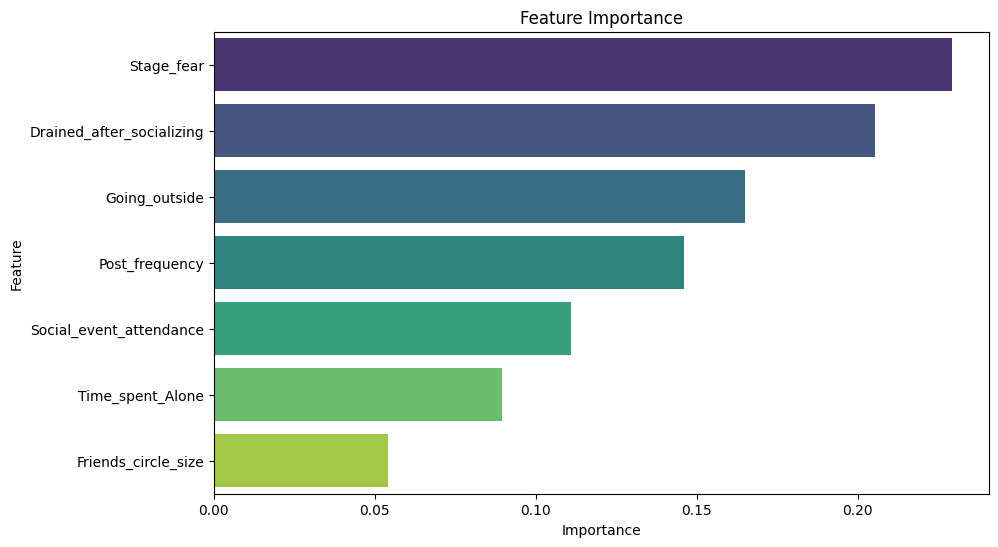

In [20]:
# Visualize feature importance
import seaborn as sns
import pandas as pd

importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance")
plt.show()
